# Covid 19 Analysis

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
import pandas as pd

### 2) Data visualization
- - -

In [2]:
# load previously processed information into dataframe
df = pd.read_csv('data/covid_19_world_processed.csv', delimiter=',')
df

,Country/Region,Lat,Lat_norm,Long,Long_norm,Date,Num_days_from_begin,Num_days_from_begin_norm,Confirmed,Deaths,Recovered
0,Afghanistan,33.000000,0.373184,65.000000,0.232525,2020-01-22,0,0.000000,0,0,0.0
1,Albania,41.153300,0.505218,20.168300,-0.071789,2020-01-22,0,0.000000,0,0,0.0
2,Algeria,28.033900,0.292763,1.659600,-0.197424,2020-01-22,0,0.000000,0,0,0.0
3,Andorra,42.506300,0.527128,1.521800,-0.198359,2020-01-22,0,0.000000,0,0,0.0
4,Angola,-11.202700,-0.342631,17.873900,-0.087363,2020-01-22,0,0.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22679,West Bank and Gaza,31.952200,0.356216,35.233200,0.030471,2020-05-07,106,0.990654,375,2,176.0
22680,Western Sahara,24.215500,0.230928,-12.885800,-0.296157,2020-05-07,106,0.990654,6,0,5.0
22681,Yemen,15.552727,0.090644,48.516388,0.120636,2020-05-07,106,0.990654,25,5,1.0
22682,Zambia,-15.416700,-0.410872,28.283300,-0.016705,2020-05-07,106,0.990654,153,4,103.0


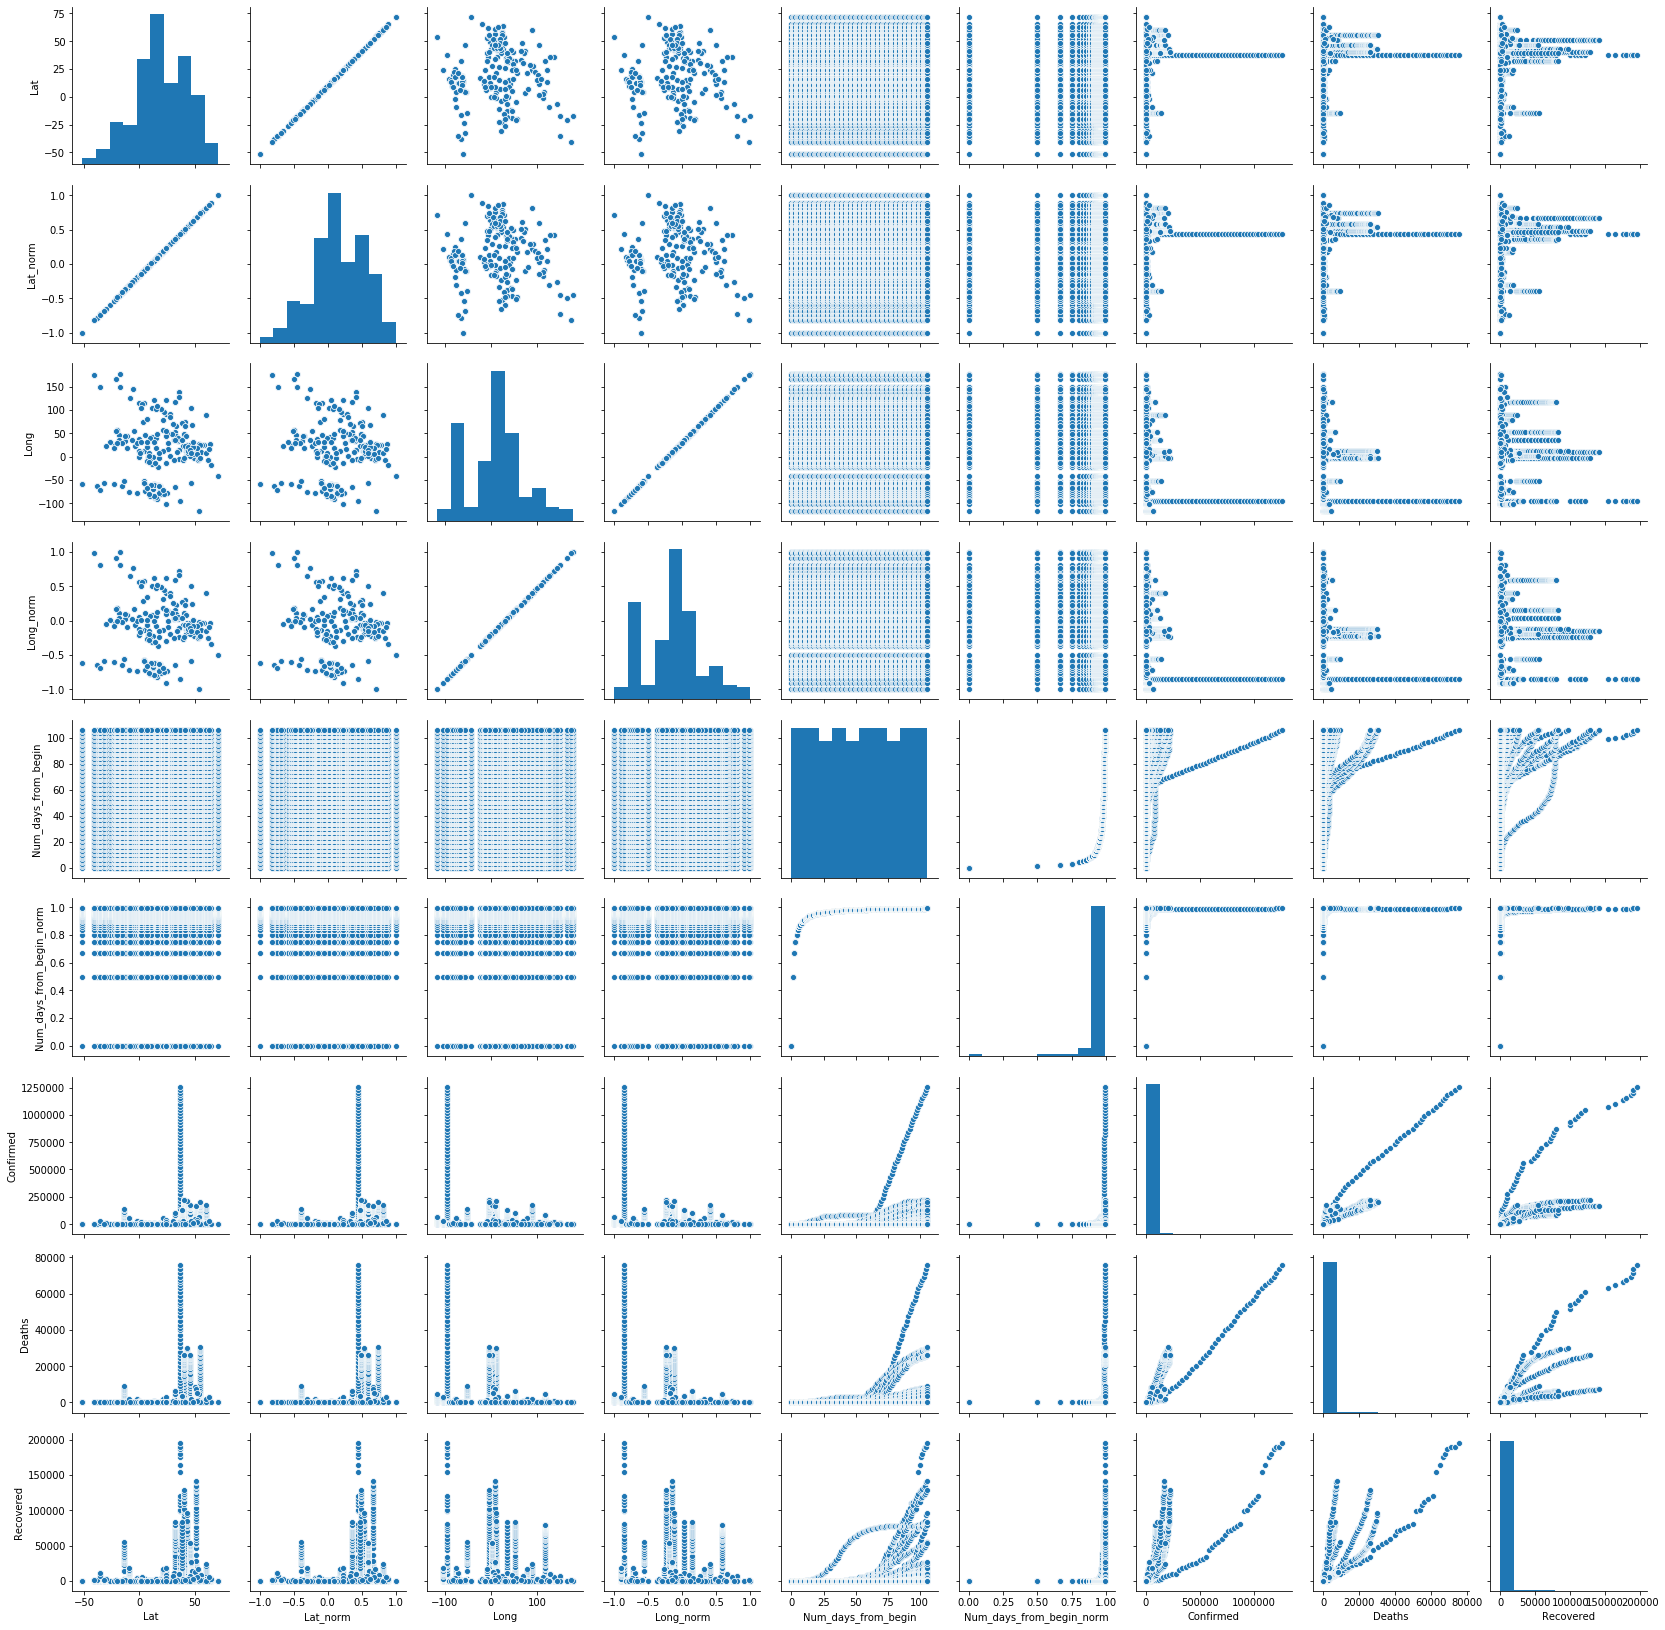

In [3]:
# compute pairplot (once more) of the general data
sb.pairplot(df)

In [4]:
# check the top 5 countries with the most confirmed, deaths, recovery and active cases.
# only the last date was used, because the results are cumulative
last_day = df["Date"].max()
last_day_data = df.loc[df["Date"] == last_day]

/opt/miniconda3/envs/iart/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/envs/iart/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/miniconda3/envs/iart/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/iart/lib/python3.7/s

([<matplotlib.axis.XTick at 0x1a275bce10>,
 <a list of 5 Text xticklabel objects>)

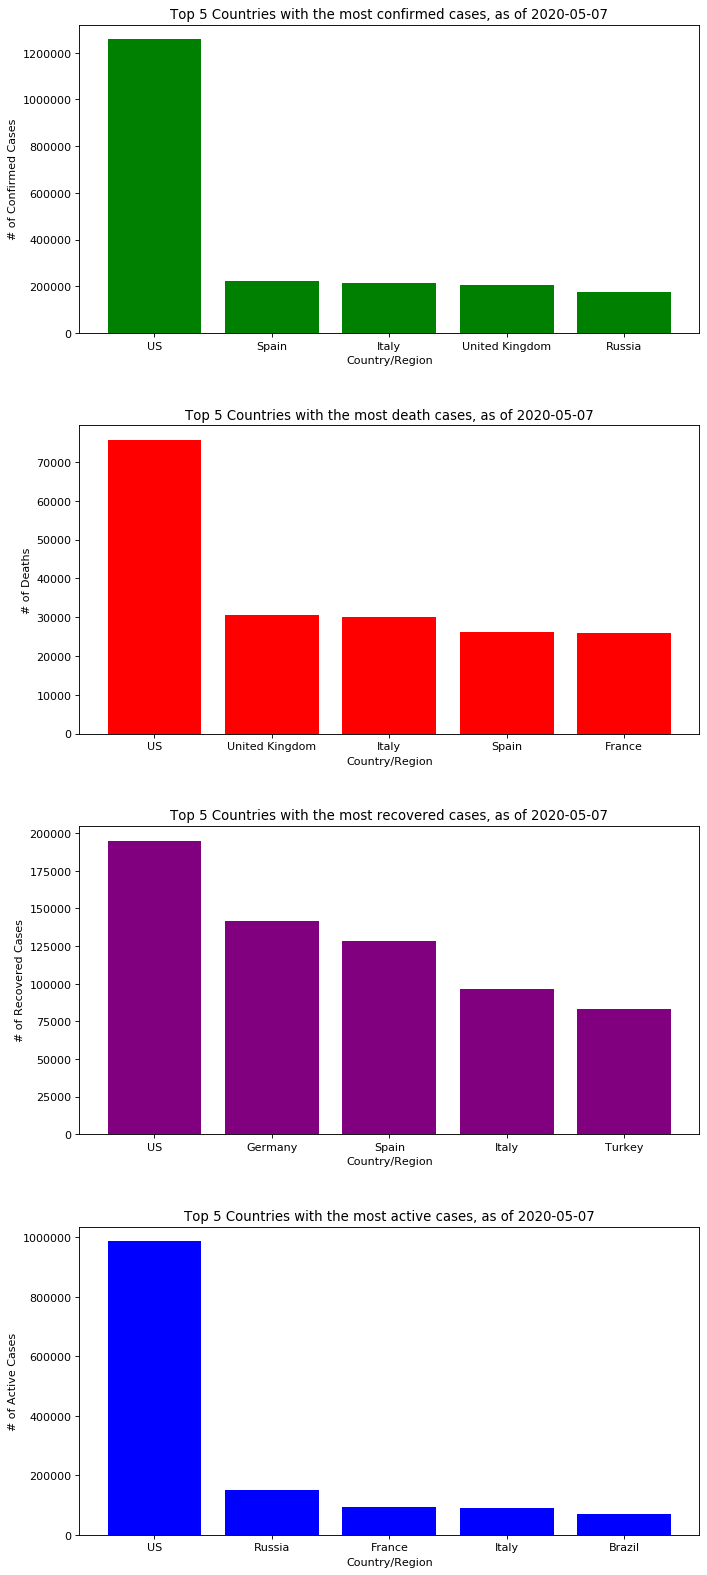

In [5]:
# get confirmed
last_day_data.sort_values(['Confirmed'], ascending=False, inplace=True)
top_5_countries_conf = last_day_data.iloc[:5]

x_conf = top_5_countries_conf["Country/Region"].values
y_conf = top_5_countries_conf["Confirmed"].values

x_pos_conf = [i for i, _ in enumerate(x_conf)]


# get deaths
last_day_data.sort_values(['Deaths'], ascending=False, inplace=True)
top_5_countries_deaths = last_day_data.iloc[:5]

x_deaths = top_5_countries_deaths["Country/Region"].values
y_deaths = top_5_countries_deaths["Deaths"].values

x_pos_deaths = [i for i, _ in enumerate(x_deaths)]


# get recovered (not to forget that we don't have data for UK, Netherlands and Canada)
last_day_data.sort_values(['Recovered'], ascending=False, inplace=True)
top_5_countries_recov = last_day_data.iloc[:5]

x_recov = top_5_countries_recov["Country/Region"].values
y_recov = top_5_countries_recov["Recovered"].values

x_pos_recov = [i for i, _ in enumerate(x_recov)]

# get active
last_day_data["Active"] = last_day_data["Confirmed"] - last_day_data["Deaths"] - last_day_data["Recovered"]
last_day_data.sort_values(['Active'], ascending=False, inplace=True)
top_5_countries_active = last_day_data.iloc[:5]

x_active = top_5_countries_active["Country/Region"].values
y_active = top_5_countries_active["Active"].values

x_pos_active = [i for i, _ in enumerate(x_active)]


figure(num=None, figsize=(10, 25), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3)

plt.subplot(4, 1, 1)
plt.bar(x_pos_conf, y_conf, color="green")
plt.xlabel("Country/Region")
plt.ylabel("# of Confirmed Cases")
plt.title("Top 5 Countries with the most confirmed cases, as of {}".format(last_day))
plt.xticks(x_pos_conf, x_conf)

plt.subplot(4, 1, 2)
plt.bar(x_pos_deaths, y_deaths, color='red')
plt.xlabel("Country/Region")
plt.ylabel("# of Deaths")
plt.title("Top 5 Countries with the most death cases, as of {}".format(last_day))
plt.xticks(x_pos_deaths, x_deaths)

plt.subplot(4, 1, 3)
plt.bar(x_pos_recov, y_recov, color='purple')
plt.xlabel("Country/Region")
plt.ylabel("# of Recovered Cases")
plt.title("Top 5 Countries with the most recovered cases, as of {}".format(last_day))
plt.xticks(x_pos_recov, x_recov)

plt.subplot(4, 1, 4)
plt.bar(x_pos_active, y_active, color='blue')
plt.xlabel("Country/Region")
plt.ylabel("# of Active Cases")
plt.title("Top 5 Countries with the most active cases, as of {}".format(last_day))
plt.xticks(x_pos_active, x_active)

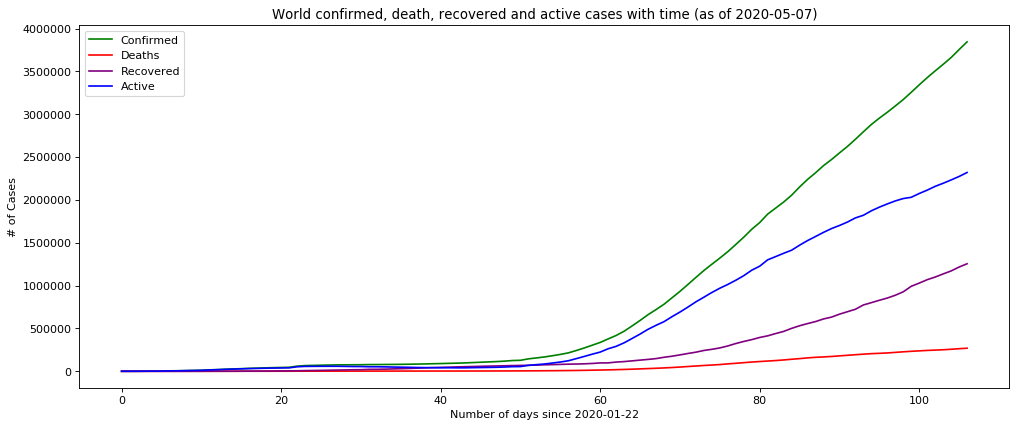

In [6]:
# compute plot of the confirmed, death, recovered and active cases, for each day
num_days = df["Num_days_from_begin"].unique()
first_day = df["Date"].min()

# compute for world
world_cases = df.groupby(["Num_days_from_begin"], as_index=False).sum()
world_conf = world_cases["Confirmed"].values
world_deaths = world_cases["Deaths"].values
world_recov = world_cases["Recovered"].values
world_active = world_conf - world_deaths - world_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, world_conf, color='green', label="Confirmed")
plt.plot(num_days, world_deaths, color='red', label="Deaths")
plt.plot(num_days, world_recov, color='purple', label="Recovered")
plt.plot(num_days, world_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("World confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

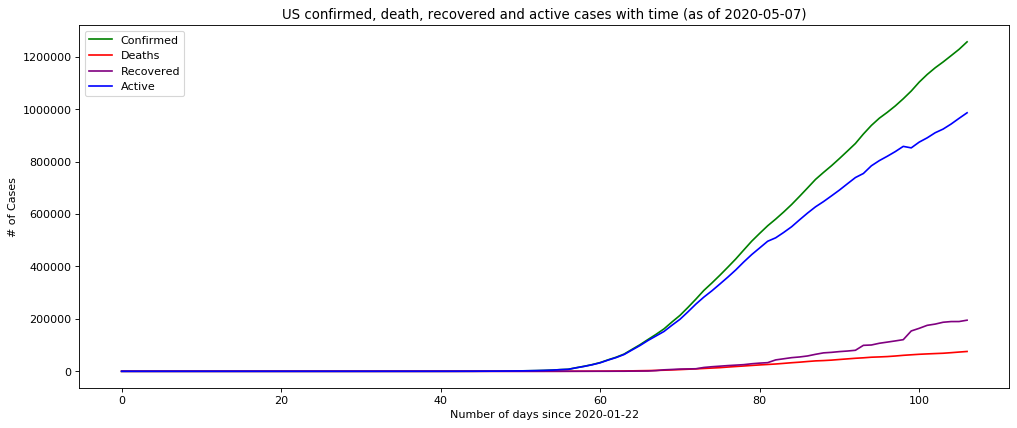

In [7]:
# compute for US
us_cases = df.loc[df["Country/Region"] == "US"]
us_conf = us_cases["Confirmed"].values
us_deaths = us_cases["Deaths"].values
us_recov = us_cases["Recovered"].values
us_active = us_conf - us_deaths - us_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, us_conf, color='green', label="Confirmed")
plt.plot(num_days, us_deaths, color='red', label="Deaths")
plt.plot(num_days, us_recov, color='purple', label="Recovered")
plt.plot(num_days, us_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("US confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

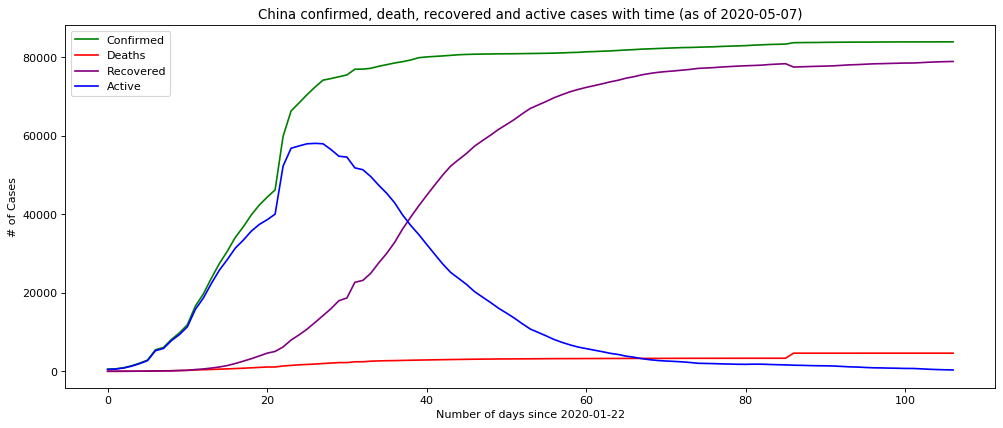

In [8]:
# compute for China
china_cases = df.loc[df["Country/Region"] == "China"]
china_conf = china_cases["Confirmed"].values
china_deaths = china_cases["Deaths"].values
china_recov = china_cases["Recovered"].values
china_active = china_conf - china_deaths - china_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, china_conf, color='green', label="Confirmed")
plt.plot(num_days, china_deaths, color='red', label="Deaths")
plt.plot(num_days, china_recov, color='purple', label="Recovered")
plt.plot(num_days, china_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("China confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

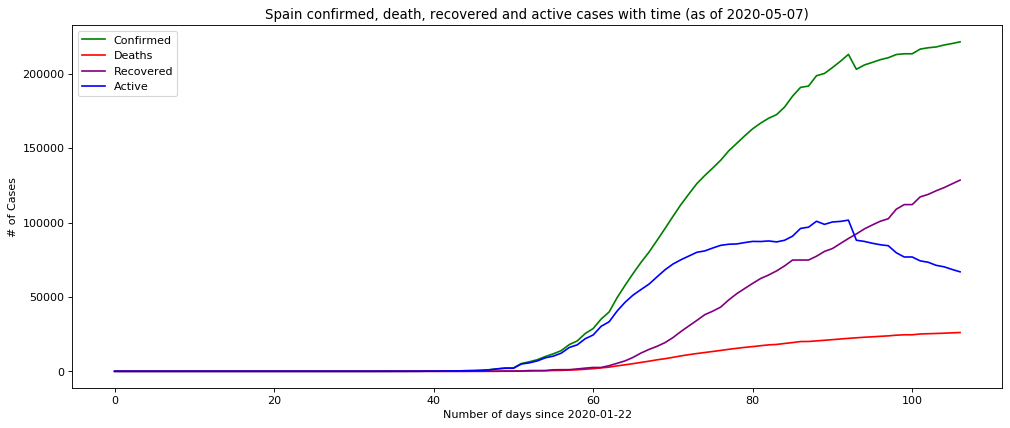

In [9]:
# compute for Spain
spain_cases = df.loc[df["Country/Region"] == "Spain"]
spain_conf = spain_cases["Confirmed"].values
spain_deaths = spain_cases["Deaths"].values
spain_recov = spain_cases["Recovered"].values
spain_active = spain_conf - spain_deaths - spain_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, spain_conf, color='green', label="Confirmed")
plt.plot(num_days, spain_deaths, color='red', label="Deaths")
plt.plot(num_days, spain_recov, color='purple', label="Recovered")
plt.plot(num_days, spain_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("Spain confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

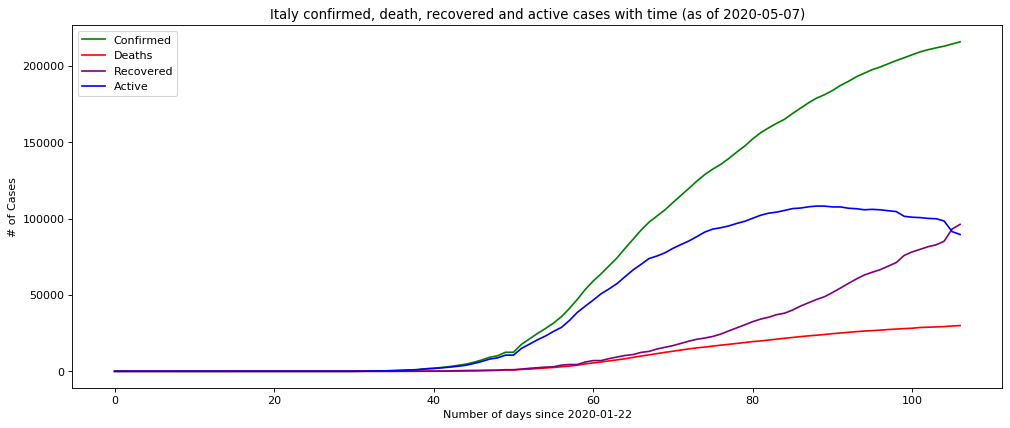

In [10]:
# compute for Italy
italy_cases = df.loc[df["Country/Region"] == "Italy"]
italy_conf = italy_cases["Confirmed"].values
italy_deaths = italy_cases["Deaths"].values
italy_recov = italy_cases["Recovered"].values
italy_active = italy_conf - italy_deaths - italy_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, italy_conf, color='green', label="Confirmed")
plt.plot(num_days, italy_deaths, color='red', label="Deaths")
plt.plot(num_days, italy_recov, color='purple', label="Recovered")
plt.plot(num_days, italy_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("Italy confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

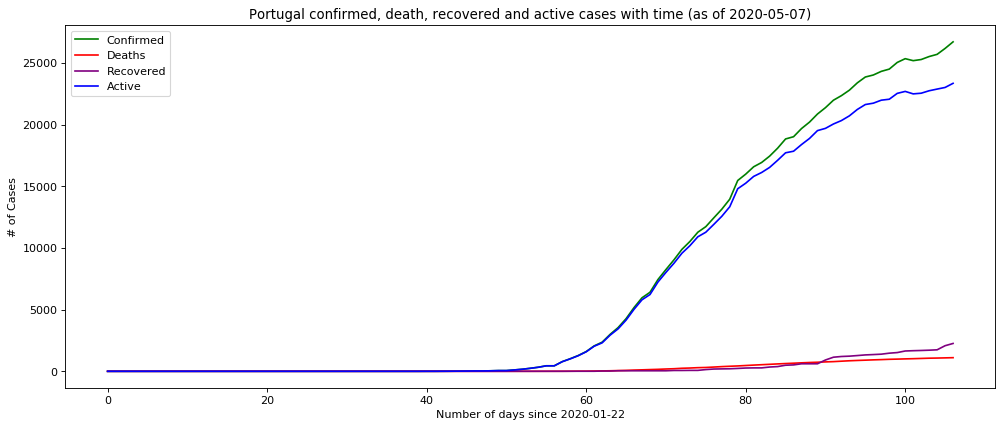

In [11]:
# compute for Portugal
portugal_cases = df.loc[df["Country/Region"] == "Portugal"]
portugal_conf = portugal_cases["Confirmed"].values
portugal_deaths = portugal_cases["Deaths"].values
portugal_recov = portugal_cases["Recovered"].values
portugal_active = portugal_conf - portugal_deaths - portugal_recov

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, portugal_conf, color='green', label="Confirmed")
plt.plot(num_days, portugal_deaths, color='red', label="Deaths")
plt.plot(num_days, portugal_recov, color='purple', label="Recovered")
plt.plot(num_days, portugal_active, color='blue', label="Active")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("Portugal confirmed, death, recovered and active cases with time (as of {})".format(last_day))
plt.legend()

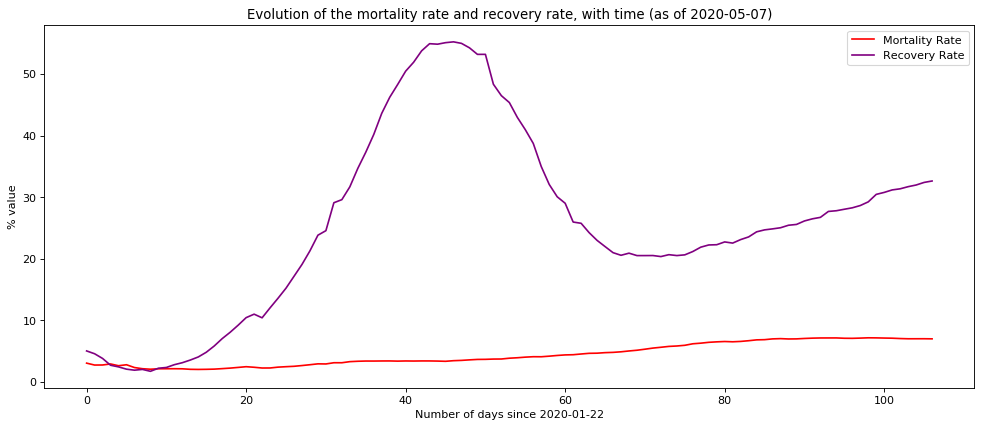

In [12]:
# compute plot for the mortality rate and recovery rate
mortality_rate = (world_deaths / world_conf) * 100
recovery_rate = (world_recov / world_conf) * 100

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num_days, mortality_rate, color='red', label="Mortality Rate")
plt.plot(num_days, recovery_rate, color='purple', label="Recovery Rate")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("% value")
plt.title("Evolution of the mortality rate and recovery rate, with time (as of {})".format(last_day))
plt.legend()

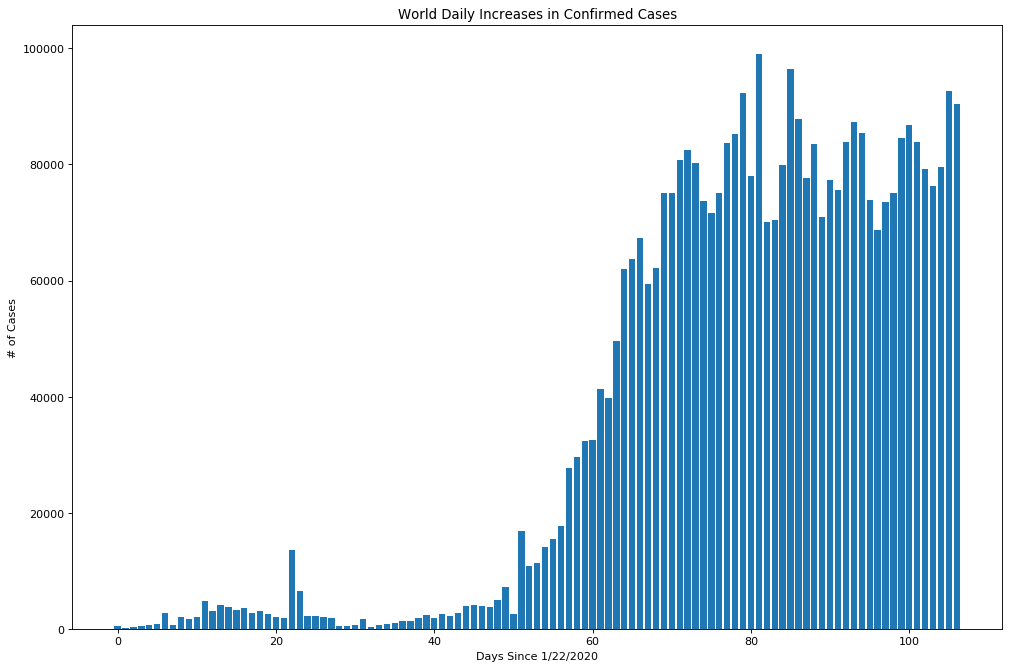

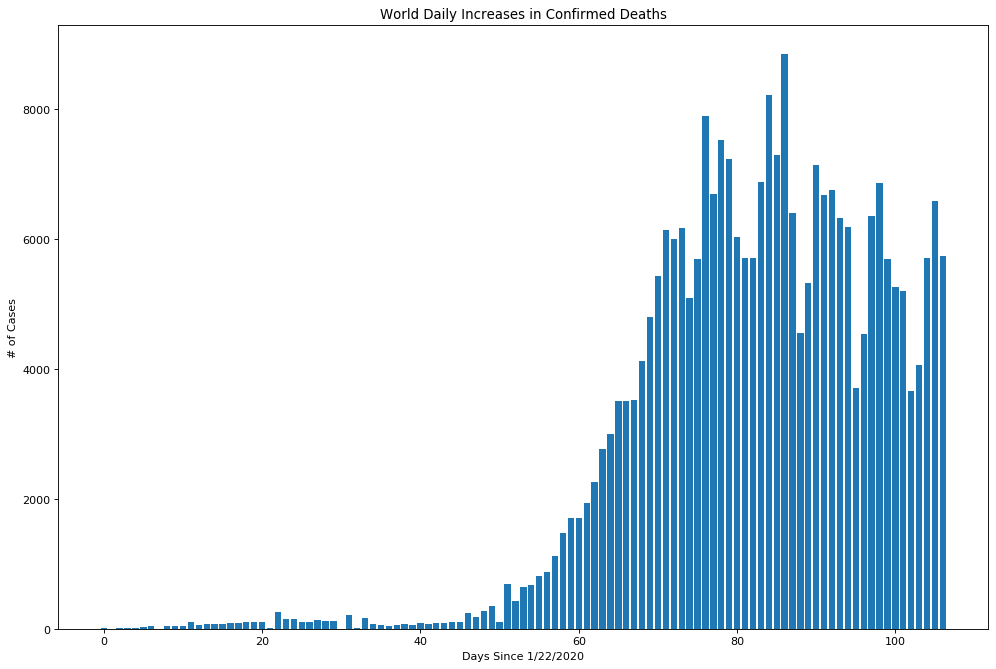

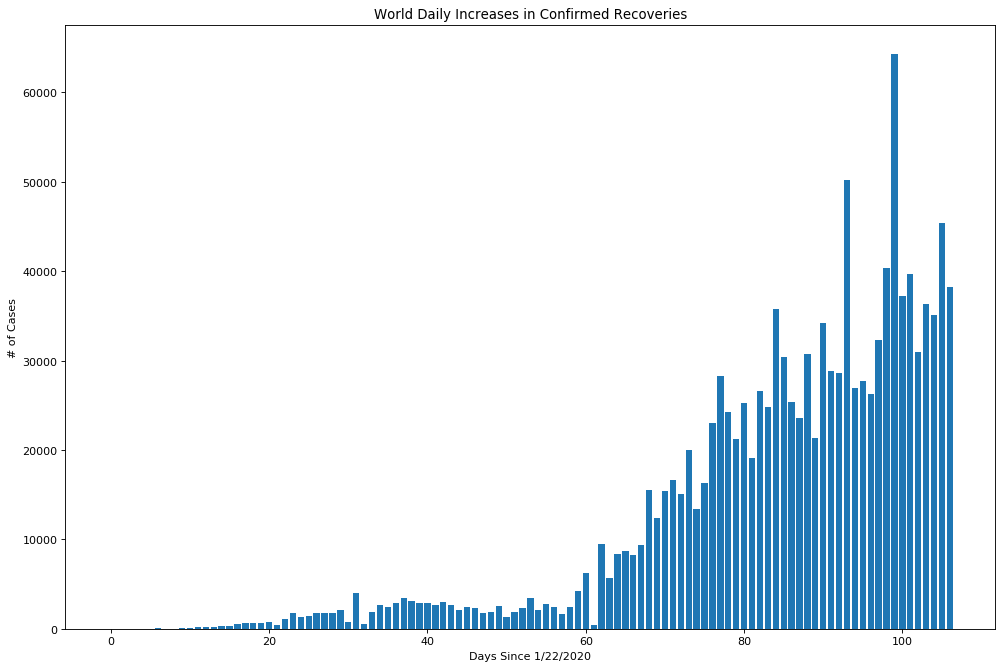

In [13]:
def calc_increase_list(in_list):
    out_list = []
    for idx, elem in enumerate(in_list):
        if idx == 0:
            out_list.append(elem)
        else:
            out_list.append(elem - in_list[idx - 1])
    return out_list


# compute the daily increases of confirmed cases, deaths and recovered cases (for world)
world_daily_conf = calc_increase_list(world_conf)
world_daily_death = calc_increase_list(world_deaths)
world_daily_recov = calc_increase_list(world_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, world_daily_conf)
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, world_daily_recov)
plt.title('World Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

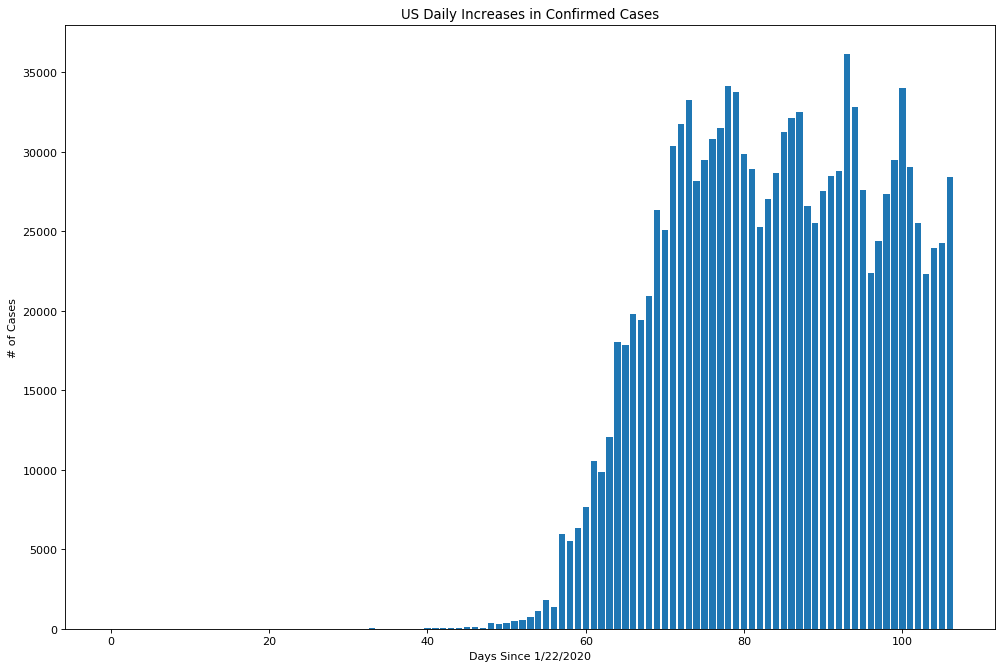

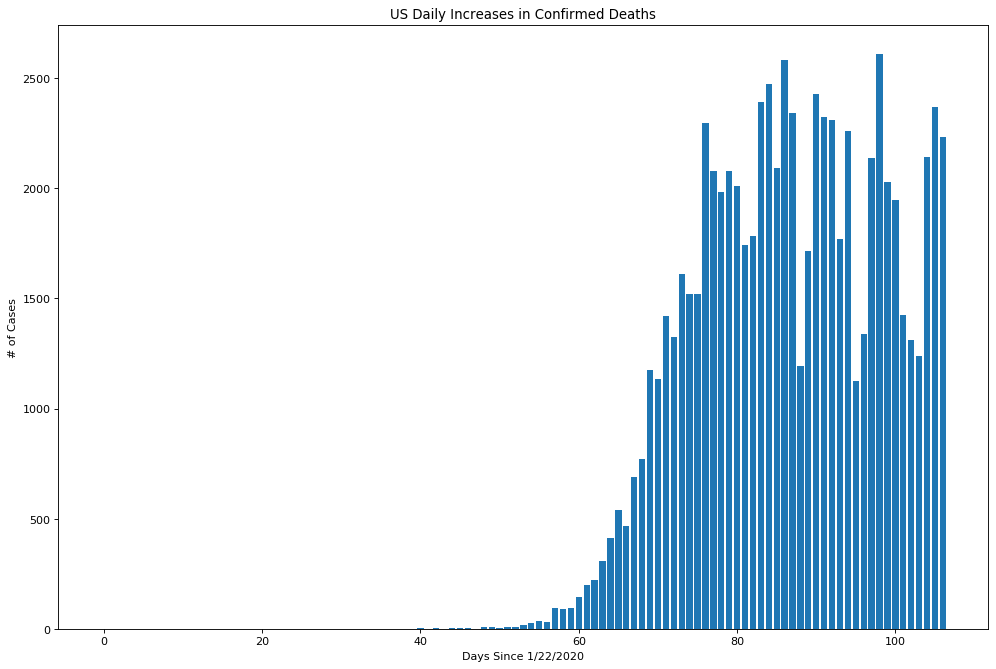

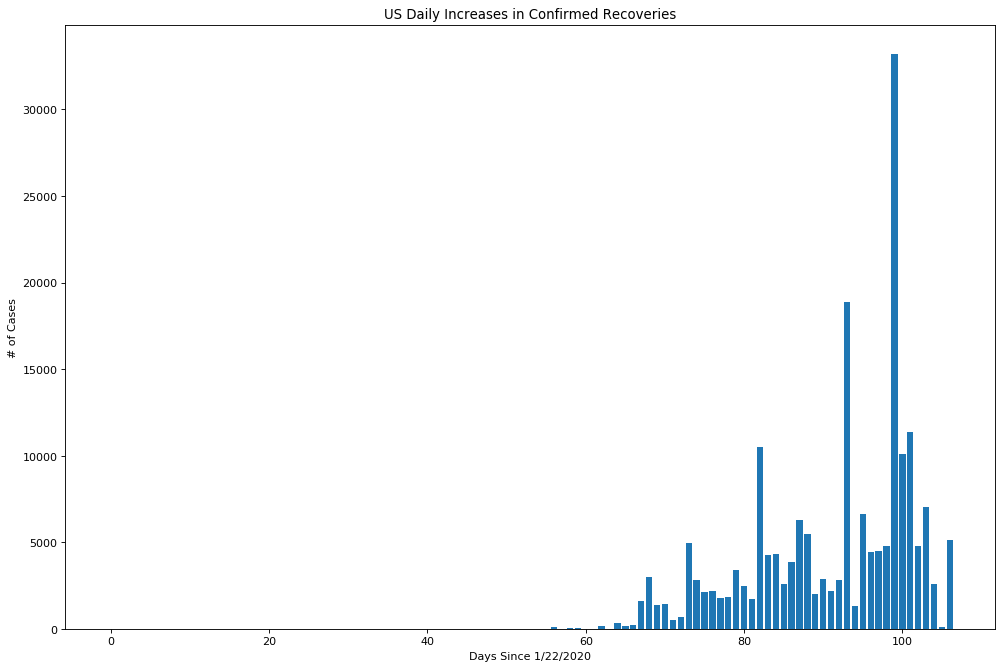

In [14]:
# compute the daily increases of confirmed cases, deaths and recovered cases (for US)
us_daily_conf = calc_increase_list(us_conf)
us_daily_death = calc_increase_list(us_deaths)
us_daily_recov = calc_increase_list(us_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, us_daily_conf)
plt.title('US Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, us_daily_death)
plt.title('US Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, us_daily_recov)
plt.title('US Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

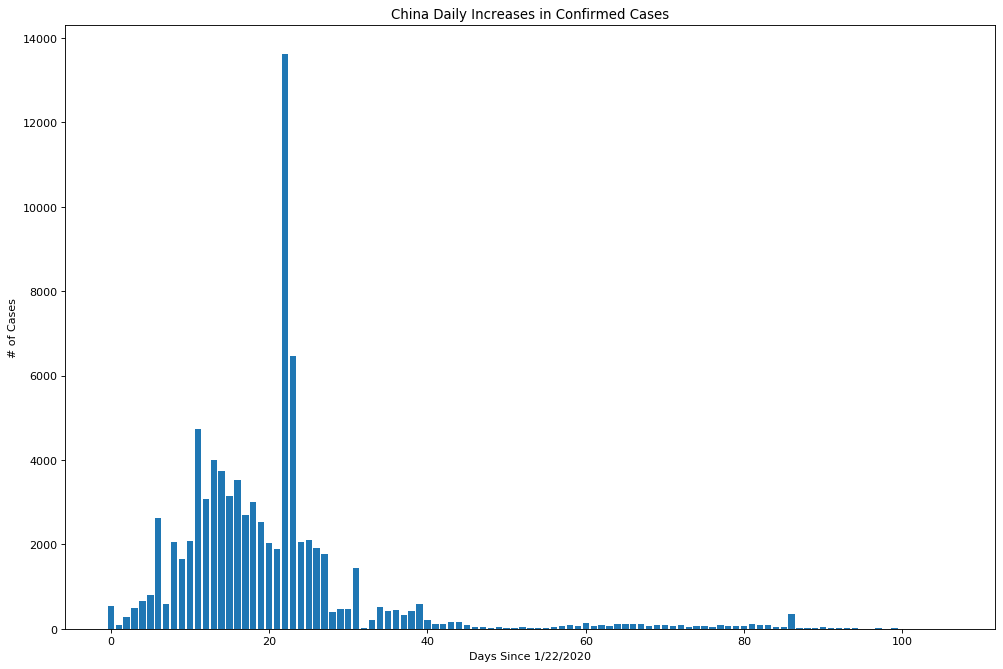

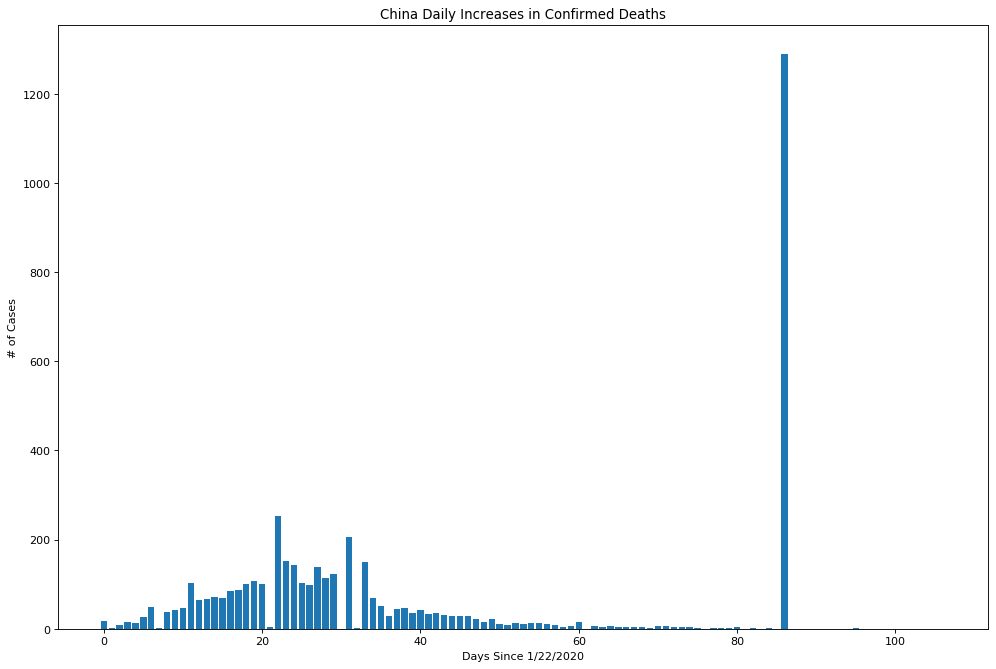

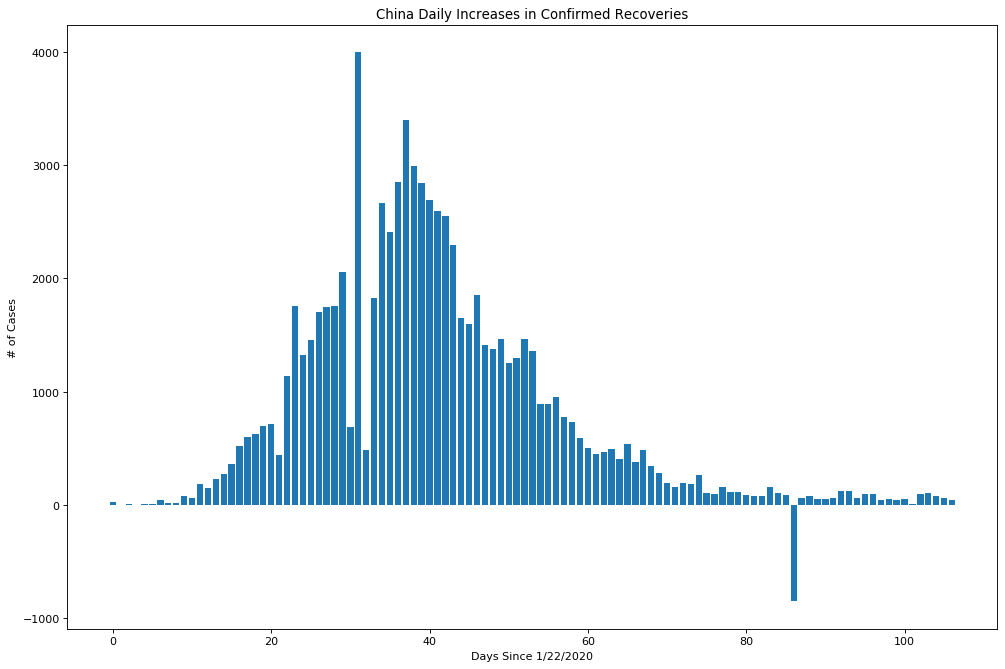

In [15]:
# compute the daily increases of confirmed cases, deaths and recovered cases (for China)
china_daily_conf = calc_increase_list(china_conf)
china_daily_death = calc_increase_list(china_deaths)
china_daily_recov = calc_increase_list(china_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, china_daily_conf)
plt.title('China Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, china_daily_death)
plt.title('China Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, china_daily_recov)
plt.title('China Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

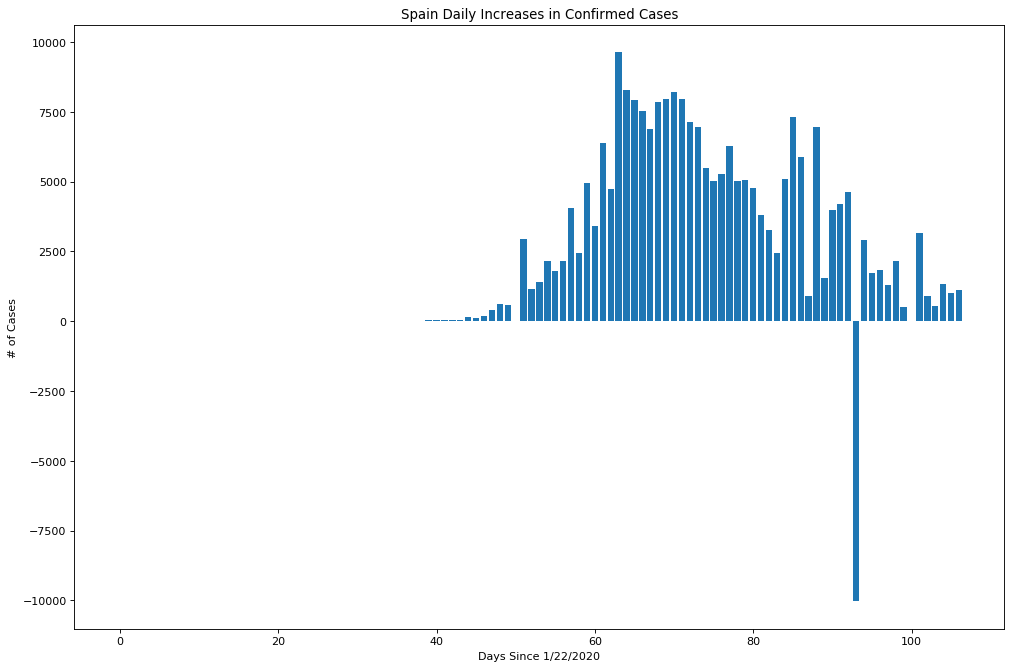

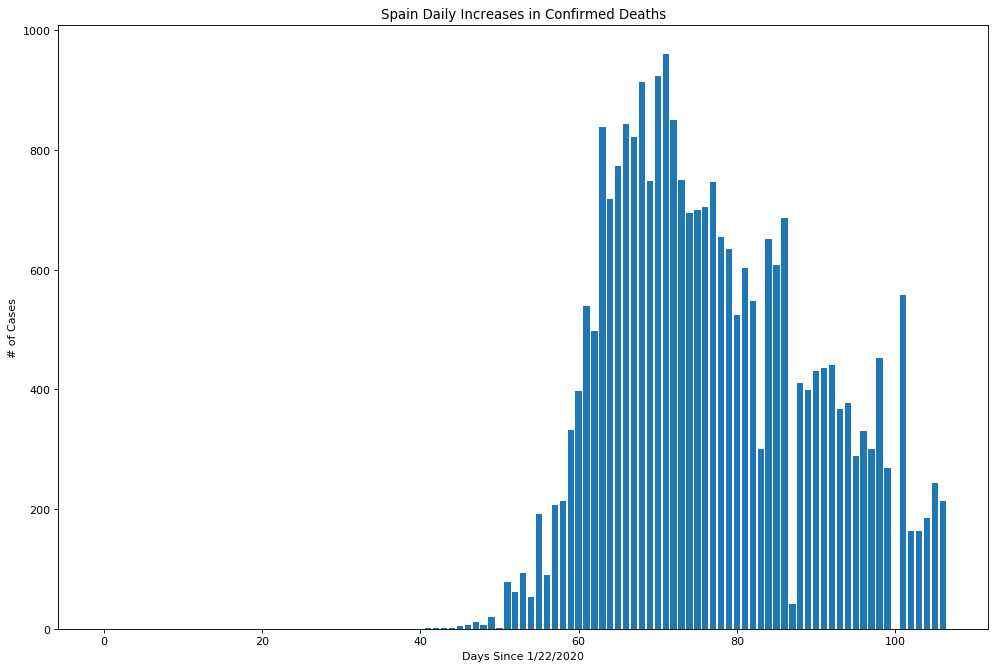

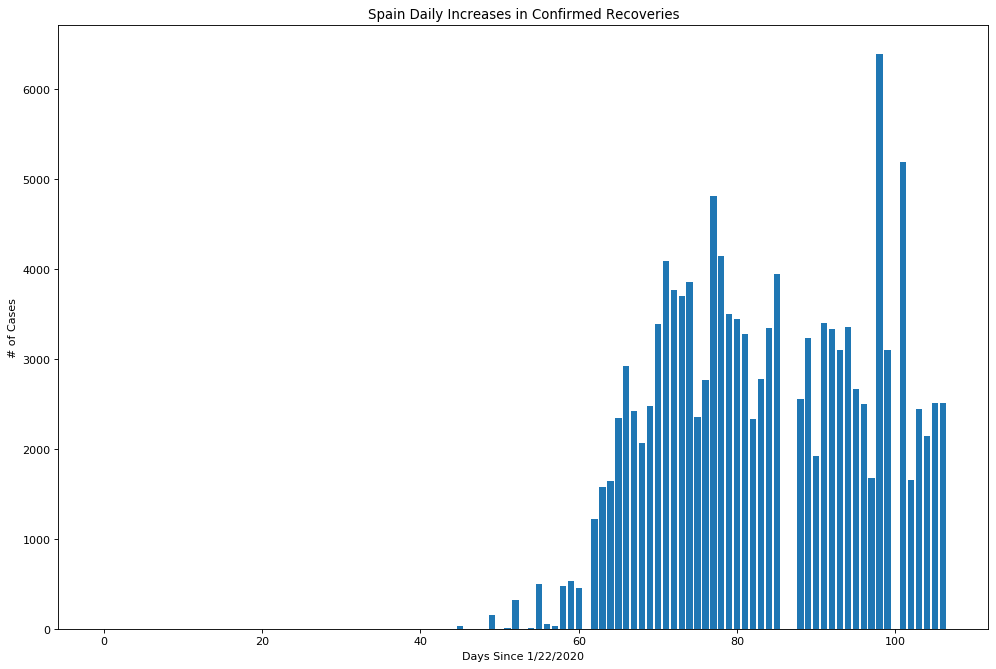

In [16]:
# compute the daily increases of confirmed cases, deaths and recovered cases (for Spain)
spain_daily_conf = calc_increase_list(spain_conf)
spain_daily_death = calc_increase_list(spain_deaths)
spain_daily_recov = calc_increase_list(spain_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, spain_daily_conf)
plt.title('Spain Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, spain_daily_death)
plt.title('Spain Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, spain_daily_recov)
plt.title('Spain Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

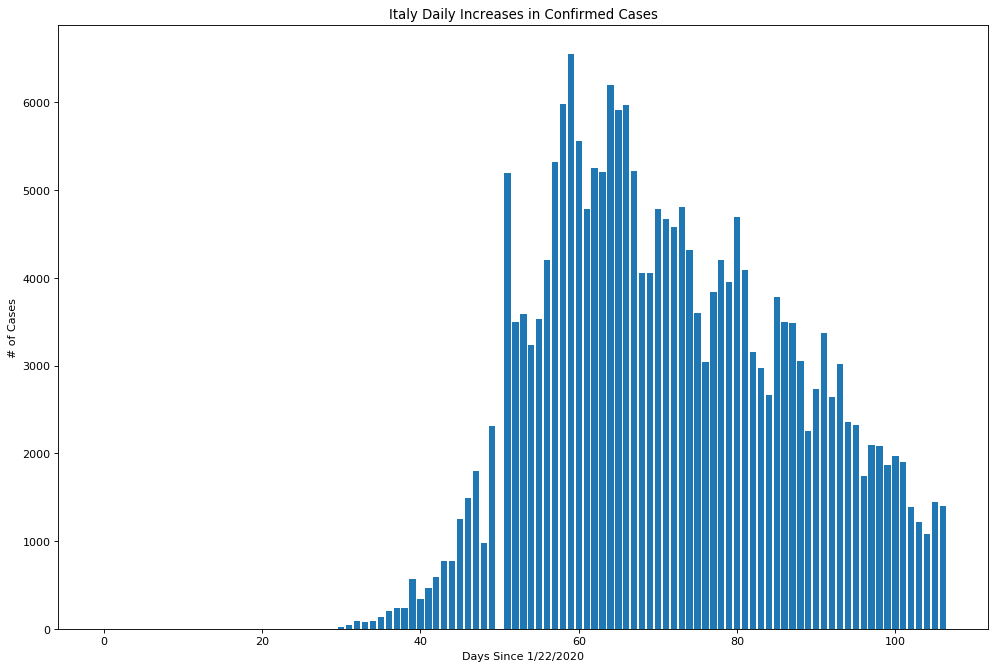

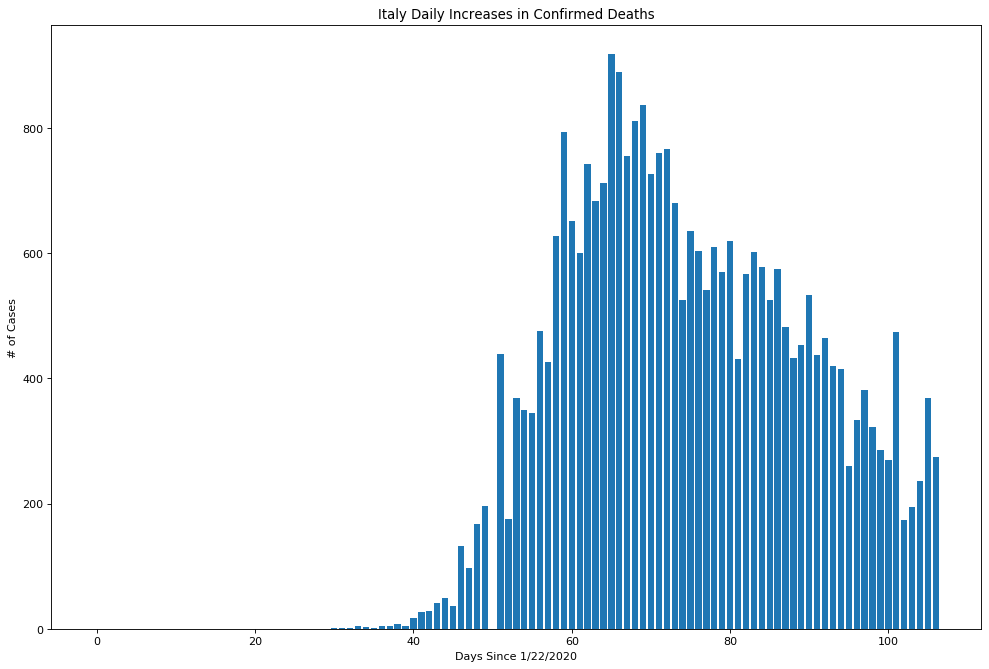

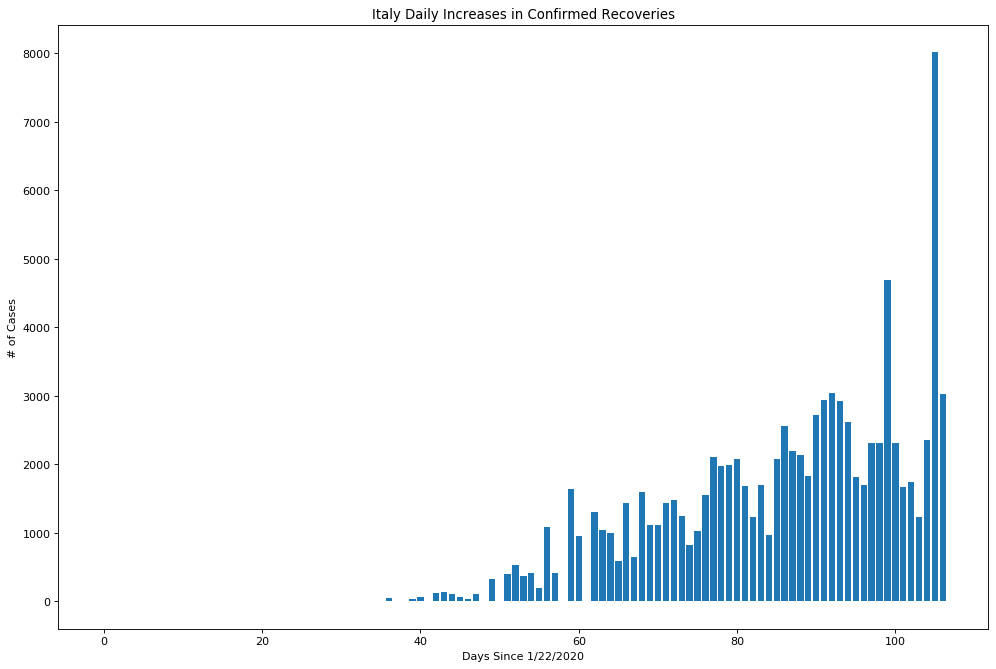

In [17]:
# compute the daily increases of confirmed cases, deaths and recovered cases (for Italy)
italy_daily_conf = calc_increase_list(italy_conf)
italy_daily_death = calc_increase_list(italy_deaths)
italy_daily_recov = calc_increase_list(italy_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, italy_daily_conf)
plt.title('Italy Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, italy_daily_death)
plt.title('Italy Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, italy_daily_recov)
plt.title('Italy Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

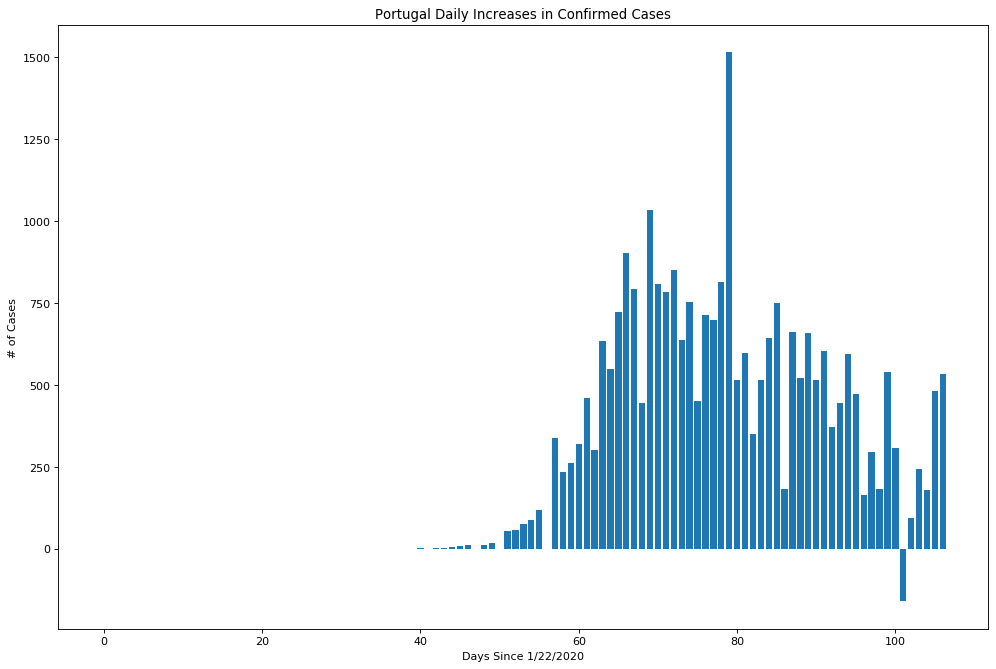

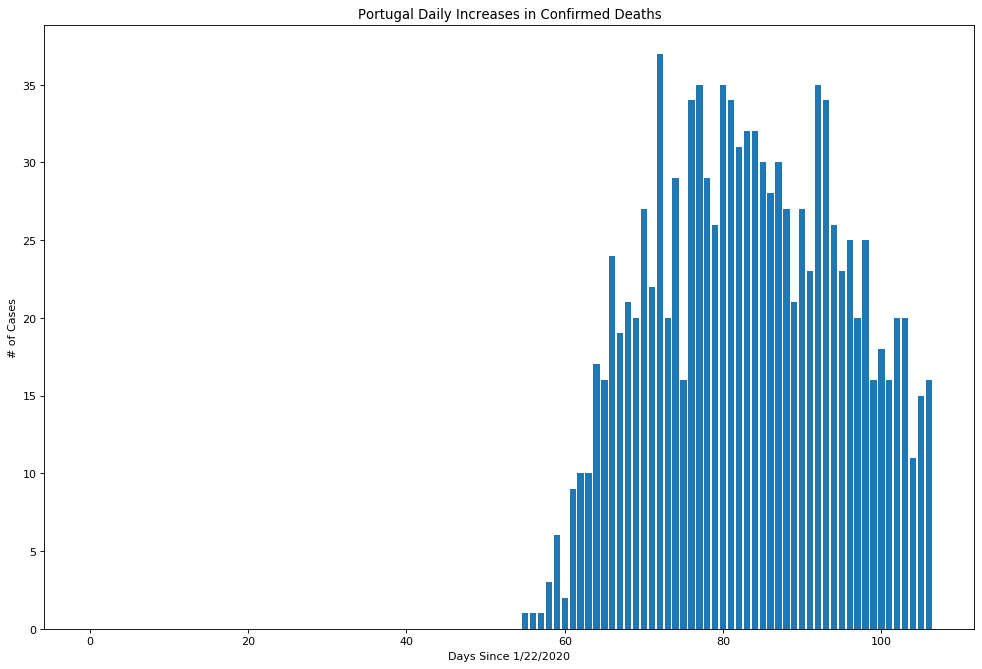

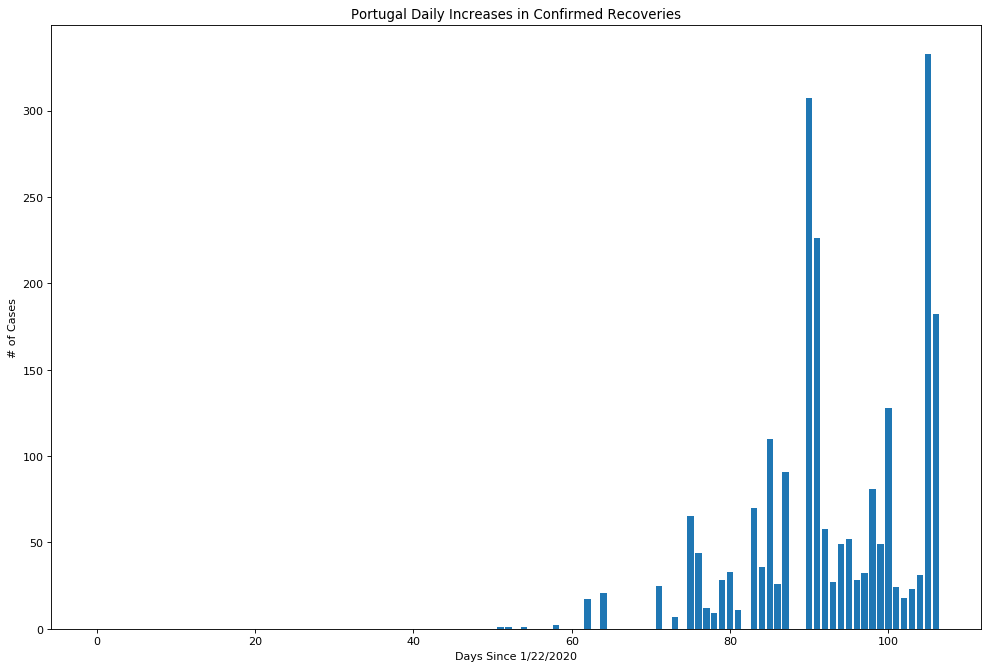

In [18]:
# compute the daily increases of confirmed cases, deaths and recovered cases (for Portugal)
portugal_daily_conf = calc_increase_list(portugal_conf)
portugal_daily_death = calc_increase_list(portugal_deaths)
portugal_daily_recov = calc_increase_list(portugal_recov)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, portugal_daily_conf)
plt.title('Portugal Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, portugal_daily_death)
plt.title('Portugal Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(num_days, portugal_daily_recov)
plt.title('Portugal Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()